<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory_Data_Analysis_PART_2" data-toc-modified-id="Exploratory_Data_Analysis_PART_2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory_Data_Analysis_PART_2</a></span><ul class="toc-item"><li><span><a href="#Re-check-correlations-of-numeric-vars" data-toc-modified-id="Re-check-correlations-of-numeric-vars-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Re-check correlations of numeric vars</a></span></li><li><span><a href="#NOTE-#3:" data-toc-modified-id="NOTE-#3:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>NOTE #3:</a></span></li></ul></li></ul></div>

# Life_Expectancy_WHO_UN_Analysis_Modeling

## Exploratory_Data_Analysis_PART_2

To:&nbsp;&nbsp;&nbsp;&nbsp; [Magnimind](https://magnimindacademy.com/)

From: Matt Curcio, matt.curcio.ri@gmail.com

Date: 2023-01-29

Re:&nbsp;&nbsp;&nbsp; NOTEBOOK #4

---


In [3]:
# Common Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Statistics related library
from scipy import stats

In [4]:
filename = '/home/mcc/Desktop/Life_Expectancy_Analysis_Modeling/data/processed/Clean_LE_Data_FEng_4.csv'

df = pd.read_csv(filename, header=0)

df.head(3)

,Country,Year,Status,LifeExpectancy,AdultMort,InfD,EtOH,PercExpen,Measles,BMI,lt5yD,Polio,TotalExpen,DTP,HIV,Thin1_19y,Thin5_9y,Income,Education,Region
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,2
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,2
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,2


In [5]:
# Convert to categorical 
df['Status'] = pd.Categorical(df['Status'])
df['Region'] = pd.Categorical(df['Region'])

print(f'\nFile "{filename}" has:\n\n', df.shape[0], 'observations &', df.shape[1], 'features.\n')


File "/home/mcc/Desktop/Life_Expectancy_Analysis_Modeling/data/processed/Clean_LE_Data_FEng_4.csv" has:

 2928 observations & 20 features.



### Re-check correlations of numeric vars

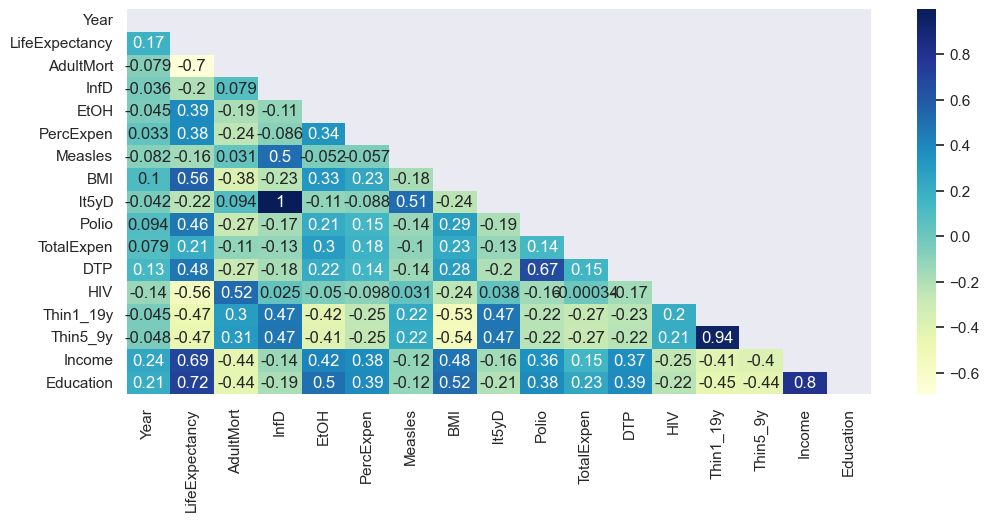

In [6]:
# creating triangular mask
mask = np.triu(np.ones_like(df.corr()))
 
# plotting a triangle correlation heatmap
sns.set(rc={"figure.figsize":(12, 5)}) #width=3, #height=4
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

### NOTE #1:

- `InfD` and 'lt5yD`are highly correlated with cor = 1.

- `Thin1_19y`and `Thin5_9y`are highly correlated, cor=0.94

- The absolute values of correlations between Life Expectancy and {Income:0.69} and {Education:0.72} are greatest.

**Correlation with respect to Life Expectancy Listed By Absolute Magnitude**

| Feature | Value |
|--------:|------:|
|'Education'| 0.72 |
|'Income'| 0.69|
|'AdultMort'| 0.7|
|'HIV'|0.56|
|'BMI'|0.56|
|'DTP'|0.48|
|'Thin1_19y'|0.47|
|'Polio'|0.46|
|'EtOH'|0.39|
|'PercExpen|0.38|
|'lt5yD'|0.22|
|'TotalExpen'|0.21|
|'Measles'|0.16|





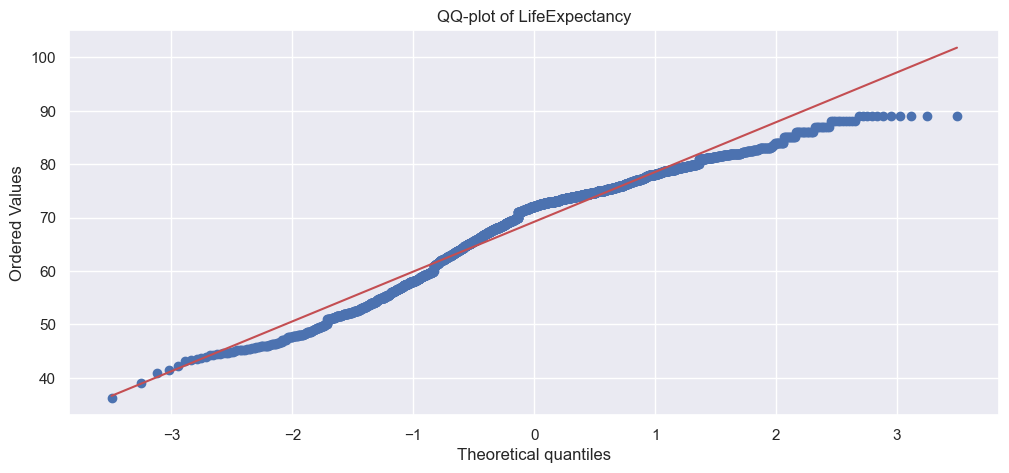

In [7]:
#Get QQ-plot of LifeExpectancy
fig = plt.figure()
res = stats.probplot(df['LifeExpectancy'], plot=plt)
plt.title('QQ-plot of LifeExpectancy')
plt.show() 

### Mean, Stddev, Skew, Kurtosis table

| | Mean | Median | Stddev | Skew | Kurtosis |
|-|-----:| ------:| ------:| ----:| --------:|
|LifeExpectancy| 69.2|72.1|  9.52| -0.639| -0.234|